In [58]:
from dbfread import DBF
from simpledbf import Dbf5
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import time

from geopy.geocoders import Nominatim

%matplotlib inline

In [2]:
#for record in DBF("BusStops.dbf"):
#    print(record)

# Bus Stops

In [3]:
dbf_df_bus = Dbf5("BusStops.dbf")

In [4]:
df_bus_stops = dbf_df_bus.to_dataframe()

In [5]:
df_bus_stops.head()

,BSID,LONG,LAT,X_COORD,Y_COORD,ROUTES,STOPNAME,DIR,DISTANCE,POSTAL,PID,LOCATION
0,10910.0,-105.126599,39.761968,3.104975e+06,1.702643e+06,32,W 32nd Ave & Routt St,W,40.0,80033,0,N
1,10911.0,-105.053605,39.762138,3.125496e+06,1.702797e+06,32,W 32nd Ave & Sheridan Blvd,W,65.0,80212,0,F
2,10912.0,-105.052799,39.762062,3.125723e+06,1.702771e+06,32,W 32nd Ave & Sheridan Blvd,E,105.0,80212,0,F
3,10913.0,-105.042560,39.762094,3.128601e+06,1.702797e+06,32,W 32nd Ave & Stuart St,E,65.0,80212,0,F
4,10914.0,-105.043351,39.762155,3.128379e+06,1.702818e+06,32,W 32nd Ave & Stuart St,W,130.0,80212,0,F


In [6]:
#df_bus_stops.to_csv("colorado_bus_stops.csv")

exploring bustops

In [7]:
df_bus_stops.shape

(9142, 12)

In [8]:
df_bus_stops["ROUTES"].unique()

array(['32', '34', '19', '92', '19, 104', '88, 12', '12, 19, 112, 104',
       '1, 9', '9', '10', '31, 112', '51, 112', '205', '12, 120', '52, 9',
       '1, 16', '1', 'JUMP', '28, 44, 32', '44, 32', '20', '15', '28, 32',
       '204', '16, 16L', 'FF7, RX, FF, 122X', '1, 52', '3L, 1, 3, 83',
       '3L, 1, 83', '1, 46', 'FF7, RX, FF, 52, 122X', '326', '28',
       '205, BOLT, 208', '205, BOLT, BOND, 208', '236, 205, FF, BOLT, AB',
       '17', '153', '121', '209, BOND', 'BOND', 'BOND, 208', 'HOP, BOND',
       '43', '36L, 59, 29, 36', '46', '3', '16', '15L, 15',
       '6, 16, 15L, 15', '6, 16, 15L, 10, 0, 15', '169, 169L, 15',
       '16, GS, 16L', '3, 4', '3L, 153, 157, 133', '3L', '3L, 3',
       '3L, 3, 83', '3, 100', '3, 33, 4', '100L, 3, 100', '100', '88',
       '11, 14, 87L', '21', '42', '45, 42', 'GMCR', '323', '45',
       'FF, J, JUMP, STMP', 'FF, JUMP', 'J, JUMP', '206, FF, JUMP',
       '206, JUMP', 'FF, J, JUMP', '66', '0L, 66', '0L, 66, 67', '209',
       '52', '225, 204

In [9]:
df_bus_stops["BSID"].unique()

array([10910., 10911., 10912., ..., 21684., 21685., 21691.])

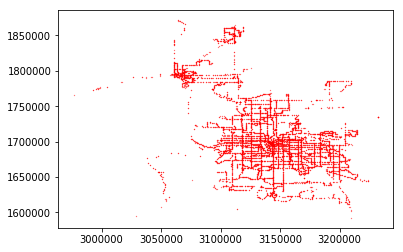

In [10]:
plt.scatter(df_bus_stops["X_COORD"], df_bus_stops["Y_COORD"], s=.05, c="r")

Light rail stations

# Light Rail Stops

Need address to Log and Lat

In [11]:
dbf_df_light = Dbf5("LightRailStations.dbf")
df_light_rail = dbf_df_light.to_dataframe()

In [12]:
df_light_rail.shape

(68, 8)

In [13]:
df_light_rail.head()

,PID,NAME,ADDRESS,AUTOS,RACKS,LOCKERS,DISTRICT,SHELTERS
0,64,Littleton / Mineral Station,7500 S Platte River Pkwy,1227,8,10,H,5
1,63,Littleton / Downtown Station,5780 S Prince St,361,10,12,H,5
2,65,Oxford-City of Sheridan Station,4101 Windermere St,0,1,0,H,0
3,1,Alameda Station,499 S Cherokee St,0,6,8,A,3
4,71,18th St / California Station,1776 California St,0,1,0,A,0


In [14]:
df_light_rail[df_light_rail["NAME"] == "40th / Airport - Gateway Park Station"]

,PID,NAME,ADDRESS,AUTOS,RACKS,LOCKERS,DISTRICT,SHELTERS
17,7,40th / Airport - Gateway Park Station,3900 N Salida St,1079,0,0,B,0


Address to Lat and Long

In [25]:
import os
from geopy import geocoders
from geopy.geocoders import OpenMapQuest

In [ ]:
geocoders.OpenMapQuest(api_key=Fbfe4hZNVFljwaY3qSEdGpN2QjLXyaOM)

In [26]:
OMP = OpenMapQuest(api_key="Fbfe4hZNVFljwaY3qSEdGpN2QjLXyaOM")

In [29]:
OMP.geocode("1776 California St Denver")

Location(18th St & California, 1776, California Street, Central Business District, Denver, Denver County, Colorado, 80202, United States of America, (39.7468319, -104.9899893, 0.0))

In [54]:
location = OMP.geocode("7500 S Platte River Pkwy Denver")
#print(location.latitude, location.longitude)

In [57]:
OMP.geocode("7500 S Platte River Pkwy Denver Colorado")

In [45]:
loc_lat = []
loc_long = []

for address in df_light_rail.ADDRESS:
    try:
        inputaddress = address + " Denver Colorado"
        location = OMP.geocode(inputaddress, timeout=15)
        loc_lat.append(location.latitude)
        loc_long.append(location.longitude)
    except Exception as e:
        print("error, skipping address... ", address)

error, skipping address...  7500 S Platte River Pkwy
error, skipping address...  5780 S Prince St
error, skipping address...  4101 Windermere St
error, skipping address...  1499 4th Street
error, skipping address...  8820 E Caley Ave
error, skipping address...  9450 E Dry Creek Rd
error, skipping address...  10203 Station Way
error, skipping address...  5565 Wadsworth Byp
error, skipping address...  1310 N Federal Blvd
error, skipping address...  1245 N Knox Ct
error, skipping address...  1199 N Perry St
error, skipping address...  1298 Wadsworth Blvd
error, skipping address...  1311 Oak St
error, skipping address...  11601 W 2nd Place
error, skipping address...  605 Johnson Rd
error, skipping address...  14577 Centrepoint Dr
error, skipping address...  2480 Fitzsimons Pkwy
error, skipping address...  26800 E 84th Ave
error, skipping address...  3200 W 71st Ave
error, skipping address...  4800 W 60th Ave
error, skipping address...  5301 Kipling St
error, skipping address...  12068 W 50

# Park N Ride Locations

Need address to Log and Lat

In [15]:
dbf_df_pnr = Dbf5("ParkNRides.dbf")
df_park_n_ride = dbf_df_pnr.to_dataframe()

In [16]:
df_park_n_ride.shape

(89, 17)

In [17]:
df_park_n_ride.head()

,PID,CLASS,NAME,LOCAL_RT,EXPRESS_RT,LIMITED_RT,REGIONAL_R,SKYRIDE_RT,LINE,AUTOS,RACKS,LOCKERS,SHELTERS,ADDRESS,DISTRICT,ZIPCODE,CITY
0,12,PNR,US85 / 72nd Ave,48-72-72W,NaN,NaN,RC,NaN,NaN,83,4,4,3,7195 Brighton Blvd,K,80022,Commerce City
1,42,PNR,Alameda / Havana,3L-105,NaN,NaN,NaN,NaN,NaN,128,6,3,1,200 S Havana St,E,80012,Aurora
2,10,PNR,SH 72 / SH 93,NaN,NaN,NaN,GS,NaN,NaN,14,3,0,2,Hwy 72 / Hwy 93,L,80403,Arvada
3,7,LRT,40th / Airport - Gateway Park Station,37-42-45-121-169,NaN,NaN,NaN,ATA,NaN,1079,16,10,12,3900 N Salida St,B,80011,Aurora
4,34,PNR,Olde Town Arvada,50-52-55L-72-72W-76,NaN,NaN,NaN,NaN,NaN,400,4,8,4,7430 Grandview Ave,L,80002,Arvada


# Bus Stop Times

In [18]:
df_stop_times = pd.read_table("stop_times.txt", delimiter=",")

In [19]:
df_stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,112186527,22:38:00,22:39:00,26280,1,NaN,0,1,NaN
1,112186527,22:41:32,22:41:32,14986,2,NaN,0,0,NaN
2,112186527,22:42:46,22:42:46,14988,3,NaN,0,0,NaN
3,112186527,22:44:00,22:44:00,14982,4,NaN,0,0,NaN
4,112186527,22:45:07,22:45:07,17779,5,NaN,0,0,NaN


In [20]:
df_stop_times.shape

(881928, 9)

In [21]:
df_stop_times[df_stop_times["stop_id"] == 10910]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
394773,112199261,10:59:37,10:59:37,10910,59,NaN,0,0,NaN
394823,112199262,10:29:37,10:29:37,10910,43,NaN,0,0,NaN
394889,112199263,09:59:37,09:59:37,10910,59,NaN,0,0,NaN
394939,112199264,09:29:37,09:29:37,10910,43,NaN,0,0,NaN
395005,112199265,09:01:37,09:01:37,10910,59,NaN,0,0,NaN
395071,112199266,08:31:37,08:31:37,10910,59,NaN,0,0,NaN
395137,112199267,19:44:10,19:44:10,10910,59,NaN,0,0,NaN
395187,112199268,15:31:37,15:31:37,10910,43,NaN,0,0,NaN
395237,112199269,19:01:37,19:01:37,10910,43,NaN,0,0,NaN
395303,112199270,18:33:37,18:33:37,10910,59,NaN,0,0,NaN


In [63]:
time.localtime()

time.struct_time(tm_year=2018, tm_mon=11, tm_mday=28, tm_hour=16, tm_min=24, tm_sec=40, tm_wday=2, tm_yday=332, tm_isdst=0)

In [67]:
time.gmtime()

time.struct_time(tm_year=2018, tm_mon=11, tm_mday=28, tm_hour=23, tm_min=26, tm_sec=8, tm_wday=2, tm_yday=332, tm_isdst=0)